**Preliminary - Exploratory Data Analysis (EDA)**

In [ ]:
#Import necessary Libraries and Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import csv
import os
import sys
import socket
import time
import warnings
warnings.filterwarnings("ignore")
from numpy import array
from random import random
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB#57
from sklearn.naive_bayes import GaussianNB#52
from sklearn.naive_bayes import MultinomialNB#56
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from google.colab import files
from sklearn.cluster import KMeans


In [ ]:
#Import random Netflow data from the server
netflow1 = pd.read_csv('/content/nfcapd202108050815.csv')
netflow2 = pd.read_csv('/content/nfcapd202108100735.csv')
netflow3 = pd.read_csv('/content/nfcapd202108150655.csv')
netflow4 = pd.read_csv('/content/nfcapd202108250600.csv')
pcap1 = pd.read_csv('/content/lldp-202108111511.csv')

In [ ]:
#Shape of each dataset
print(netflow1.shape)
print(netflow2.shape)
print(netflow3.shape)
print(netflow4.shape)
print(pcap1.shape)

(888, 48)
(2854, 48)
(3047, 48)
(2633, 48)
(80, 7)


In [ ]:
#Column attributes of netflow dataset
netflow.columns

Index(['ts', 'te', 'td', 'sa', 'da', 'sp', 'dp', 'pr', 'flg', 'fwd', 'stos',
       'ipkt', 'ibyt', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk',
       'dtos', 'dir', 'nh', 'nhb', 'svln', 'dvln', 'ismc', 'odmc', 'idmc',
       'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7',
       'mpls8', 'mpls9', 'mpls10', 'cl', 'sl', 'al', 'ra', 'eng', 'exid',
       'tr'],
      dtype='object')

In [ ]:
#Top instances of netflow1 dataset
netflow1.head(n=20)

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,nh,nhb,svln,dvln,ismc,odmc,idmc,osmc,mpls1,mpls2,mpls3,mpls4,mpls5,mpls6,mpls7,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2021-08-05 08:14:56,2021-08-05 08:15:28,31.78,44.149.43.203,44.149.43.132,5062,5060,UDP,......,0,104,11,5808,0,0,6,3,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
1,2021-08-05 08:15:30,2021-08-05 08:15:30,0.00,44.149.43.198,44.149.43.193,55684,53,UDP,......,0,0,1,69,0,0,6,0,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
2,2021-08-05 08:15:30,2021-08-05 08:15:30,0.00,44.149.43.193,44.149.43.198,53,55684,UDP,......,0,0,1,235,0,0,0,6,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
3,2021-08-05 08:15:30,2021-08-05 08:15:30,0.00,74.116.41.13,44.149.43.198,4739,35957,UDP,......,0,192,1,524,0,0,0,6,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
4,2021-08-05 08:15:30,2021-08-05 08:15:30,0.00,44.149.43.198,74.116.41.13,35957,4739,UDP,......,0,0,3,1320,0,0,6,6,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
5,2021-08-05 08:15:31,2021-08-05 08:15:31,0.00,44.225.43.194,44.149.43.1,123,123,UDP,......,0,0,1,76,0,0,6,3,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
6,2021-08-05 08:15:31,2021-08-05 08:15:31,0.00,44.149.43.1,44.225.43.194,123,123,UDP,......,0,184,1,76,0,0,3,6,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
7,2021-08-05 08:15:31,2021-08-05 08:15:31,0.00,44.148.20.52,255.255.255.255,5678,5678,UDP,......,0,0,1,175,0,0,14,0,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,3,1970-01-01 00:00:00.000
8,2021-08-05 08:15:33,2021-08-05 08:15:33,0.00,44.149.43.21,44.149.43.203,5060,5063,UDP,......,0,0,1,606,0,0,3,6,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000
9,2021-08-05 08:15:35,2021-08-05 08:15:35,0.00,44.149.43.199,44.149.43.193,42232,53,UDP,......,0,0,1,64,0,0,6,0,0,0,0,0,0,0,0.0.0.0,0.0.0.0,0,0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 00:00:00.000


In [ ]:
#Top instances of netflow3 dataset
netflow3.head(n=10)

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,nh,nhb,svln,dvln,ismc,odmc,idmc,osmc,mpls1,mpls2,mpls3,mpls4,mpls5,mpls6,mpls7,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2021-08-15 06:54:44,2021-08-15 06:55:26,41.760,44.143.107.129,44.225.42.181,39776,14580.0,TCP,.A....,0.0,0.0,8.0,1001.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
1,2021-08-15 06:54:44,2021-08-15 06:55:26,41.760,44.225.42.181,44.143.107.129,14580,39776.0,TCP,.AP...,0.0,0.0,8.0,641.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
2,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.149.16.139,44.225.41.134,43378,8080.0,TCP,....S.,0.0,0.0,1.0,60.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
3,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.225.41.134,44.149.16.139,8080,43378.0,TCP,.A.R..,0.0,0.0,1.0,40.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
4,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.149.16.139,44.225.41.134,57544,81.0,TCP,....S.,0.0,0.0,1.0,60.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
5,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.225.41.134,44.149.16.139,81,57544.0,TCP,.A.R..,0.0,0.0,1.0,40.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
6,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.149.43.132,44.149.43.129,123,123.0,UDP,......,0.0,184.0,1.0,76.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
7,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.148.20.50,255.255.255.255,5678,5678.0,UDP,......,0.0,0.0,1.0,152.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
8,2021-08-15 06:54:47,2021-08-15 06:55:27,40.510,44.148.20.49,44.149.43.68,44575,37008.0,UDP,......,0.0,0.0,17.0,2849.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000
9,2021-08-15 06:55:27,2021-08-15 06:55:27,0.000,44.148.20.50,255.255.255.255,5678,5678.0,UDP,......,0.0,0.0,1.0,152.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,3.0,1970-01-01 00:00:00.000


In [ ]:
##Top instances of netflow4 dataset
netflow4.head(n=10)

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,nh,nhb,svln,dvln,ismc,odmc,idmc,osmc,mpls1,mpls2,mpls3,mpls4,mpls5,mpls6,mpls7,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.209,44.149.43.22,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
1,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.22,44.149.43.210,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
2,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.210,44.149.43.22,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
3,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.22,44.149.43.211,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
4,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.211,44.149.43.22,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
5,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.22,44.149.43.213,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
6,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.213,44.149.43.22,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
7,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.22,44.149.43.242,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
8,2021-08-25 06:00:26,2021-08-25 06:00:26,0.000,44.149.43.242,44.149.43.22,0,0.0,ICMP,......,0.0,0.0,1.0,52.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1970-01-01 00:00:00.000
9,2021-08-25 06:00:24,2021-08-25 06:00:27,3.000,44.143.111.18,44.143.111.22,56896,179.0,TCP,....S.,0.0,192.0,3.0,180.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0.0.0,0.0.0.0,0.0,0.0,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,00:00:00:00:00:00,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,2.0,1970-01-01 00:00:00.000


In [ ]:
##Top instances of pcap1 dataset
pcap1.head(n=10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,02:fb:71:cf:3f:80,LLDP_Multicast,LLDP,130,MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User...
1,2,20.730114,Routerbo_c7:b5:2f,LLDP_Multicast,LLDP,146,MA/00:0c:42:c7:b5:2f IN/Sitenet/ether1-sitenet...
2,3,20.730133,Routerbo_c7:b5:30,LLDP_Multicast,LLDP,124,MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 Sys...
3,4,20.730140,Routerbo_c7:b5:31,LLDP_Multicast,LLDP,138,MA/00:0c:42:c7:b5:31 IN/ether3-pas-tvp 120 Sys...
4,5,20.730183,Routerbo_c7:b5:32,LLDP_Multicast,LLDP,137,MA/00:0c:42:c7:b5:32 IN/ether4-pas-sl 120 SysN...
5,6,20.730272,Routerbo_c7:b5:33,LLDP_Multicast,LLDP,124,MA/00:0c:42:c7:b5:33 IN/ether5-pas-xdo 120 Sys...
6,7,20.730504,MS-NLB-PhysServer-04_46:4e:4f:67,LLDP_Multicast,LLDP,126,MA/02:04:46:4e:4f:67 IN/EoIP-User-Bridge 120 S...
7,8,20.731570,02:da:4b:ea:4b:05,LLDP_Multicast,LLDP,153,MA/02:da:4b:ea:4b:05 IN/Sitenet/EoIP-Sitenet-P...
8,9,21.964653,Routerbo_5b:c5:06,LLDP_Multicast,LLDP,144,MA/02:57:5f:cf:1b:3f IN/bridge-sitepas/ether1 ...
9,10,21.964667,02:57:5f:cf:1b:3f,LLDP_Multicast,LLDP,134,MA/02:57:5f:cf:1b:3f IN/EoIP-Sitenetz-Powerbri...


Description of random NetFlow files

In [ ]:
netflow1.describe()

,td,sp,dp,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,svln,dvln,cl,sl,al,exid
count,888.000000,888.000000,888.000000,888.0,888.000000,888.000000,888.000000,888.0,888.0,888.000000,888.000000,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.000000
mean,3.509718,13205.685811,13119.949324,0.0,14.396396,7.490991,3532.211712,0.0,0.0,4.412162,3.420045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.146396
std,46.999267,19216.807131,19181.960908,0.0,48.880551,22.612812,23678.366868,0.0,0.0,2.930835,2.339389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521217
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,32.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,57.000000,0.0,0.0,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,0.000000,3128.000000,3128.000000,0.0,0.000000,1.000000,161.000000,0.0,0.0,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,0.000000,34620.500000,34618.500000,0.0,0.000000,6.000000,687.000000,0.0,0.0,6.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,987.190000,60773.000000,60773.000000,0.0,192.000000,239.000000,303501.000000,0.0,0.0,14.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [ ]:
netflow2.describe()

,td,sp,dp,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,svln,dvln,cl,sl,al,exid
count,2854.000000,2854.000000,2854.000000,2854.0,2854.000000,2854.000000,2854.000000,2854.0,2854.0,2854.000000,2854.000000,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.0,2854.000000
mean,3.789380,16168.591451,15670.316748,0.0,21.704275,5.048353,1286.429573,0.0,0.0,4.177996,3.350035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.764191
std,36.959228,21664.077263,21402.576375,0.0,59.133593,23.210004,11040.661147,0.0,0.0,2.789720,2.153528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504553
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,32.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,0.000000,53.000000,53.000000,0.0,0.000000,1.000000,52.000000,0.0,0.0,3.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,0.000000,4520.000000,4520.000000,0.0,0.000000,1.000000,76.000000,0.0,0.0,4.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
75%,0.000000,40662.250000,38600.750000,0.0,0.000000,3.000000,294.000000,0.0,0.0,5.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
max,1797.810000,65334.000000,65334.000000,0.0,208.000000,1017.000000,267957.000000,0.0,0.0,14.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [ ]:
netflow3.describe()

,dp,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,svln,dvln,cl,sl,al,exid
count,3044.000000,3044.0,3044.000000,3044.000000,3044.000000,3044.0,3044.0,3044.000000,3044.000000,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.0,3044.000000
mean,14795.872536,0.0,20.281209,5.874507,1780.830158,0.0,0.0,4.090342,3.330158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.734560
std,20630.055995,0.0,57.481596,34.545288,17517.333101,0.0,0.0,2.861128,2.170909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513864
min,0.000000,0.0,0.000000,1.000000,32.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,53.000000,0.0,0.000000,1.000000,52.000000,0.0,0.0,3.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,4520.000000,0.0,0.000000,1.000000,76.000000,0.0,0.0,4.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
75%,34082.500000,0.0,0.000000,3.000000,320.000000,0.0,0.0,5.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
max,63909.000000,0.0,208.000000,953.000000,489888.000000,0.0,0.0,14.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [ ]:
netflow4.describe()

,dp,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,svln,dvln,cl,sl,al,exid
count,2630.000000,2630.0,2630.000000,2630.000000,2.630000e+03,2630.0,2630.0,2630.000000,2630.000000,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.0,2630.000000
mean,14333.180989,0.0,28.371103,23.753612,4.382086e+03,0.0,0.0,3.856654,3.108365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.819392
std,19500.890139,0.0,66.658340,462.426786,9.842914e+04,0.0,0.0,2.994540,2.050347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486880
min,0.000000,0.0,0.000000,1.000000,3.200000e+01,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,53.000000,0.0,0.000000,1.000000,5.200000e+01,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,5060.000000,0.0,0.000000,1.000000,7.600000e+01,0.0,0.0,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
75%,34265.250000,0.0,0.000000,3.000000,2.252500e+02,0.0,0.0,4.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
max,60759.000000,0.0,208.000000,16558.000000,4.821461e+06,0.0,0.0,14.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [ ]:
pcap1.describe()

,No.,Time,Length
count,80.0000,80.000000,80.000000
mean,40.5000,144.833827,135.125000
std,23.2379,86.276214,8.104343
min,1.0000,0.000000,124.000000
25%,20.7500,80.728872,130.750000
50%,40.5000,141.349257,134.000000
75%,60.2500,202.008231,139.500000
max,80.0000,295.691564,153.000000


Information of random NetFlow files

In [ ]:
netflow1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      888 non-null    object 
 1   te      888 non-null    object 
 2   td      888 non-null    float64
 3   sa      888 non-null    object 
 4   da      888 non-null    object 
 5   sp      888 non-null    int64  
 6   dp      888 non-null    int64  
 7   pr      888 non-null    object 
 8   flg     888 non-null    object 
 9   fwd     888 non-null    int64  
 10  stos    888 non-null    int64  
 11  ipkt    888 non-null    int64  
 12  ibyt    888 non-null    int64  
 13  opkt    888 non-null    int64  
 14  obyt    888 non-null    int64  
 15  in      888 non-null    int64  
 16  out     888 non-null    int64  
 17  sas     888 non-null    int64  
 18  das     888 non-null    int64  
 19  smk     888 non-null    int64  
 20  dmk     888 non-null    int64  
 21  dtos    888 non-null    int64  
 22  di

In [ ]:
netflow2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      2854 non-null   object 
 1   te      2854 non-null   object 
 2   td      2854 non-null   float64
 3   sa      2854 non-null   object 
 4   da      2854 non-null   object 
 5   sp      2854 non-null   int64  
 6   dp      2854 non-null   int64  
 7   pr      2854 non-null   object 
 8   flg     2854 non-null   object 
 9   fwd     2854 non-null   int64  
 10  stos    2854 non-null   int64  
 11  ipkt    2854 non-null   int64  
 12  ibyt    2854 non-null   int64  
 13  opkt    2854 non-null   int64  
 14  obyt    2854 non-null   int64  
 15  in      2854 non-null   int64  
 16  out     2854 non-null   int64  
 17  sas     2854 non-null   int64  
 18  das     2854 non-null   int64  
 19  smk     2854 non-null   int64  
 20  dmk     2854 non-null   int64  
 21  dtos    2854 non-null   int64  
 22  

In [ ]:
netflow3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      3047 non-null   object 
 1   te      3046 non-null   object 
 2   td      3046 non-null   object 
 3   sa      3046 non-null   object 
 4   da      3046 non-null   object 
 5   sp      3046 non-null   object 
 6   dp      3044 non-null   float64
 7   pr      3044 non-null   object 
 8   flg     3044 non-null   object 
 9   fwd     3044 non-null   float64
 10  stos    3044 non-null   float64
 11  ipkt    3044 non-null   float64
 12  ibyt    3044 non-null   float64
 13  opkt    3044 non-null   float64
 14  obyt    3044 non-null   float64
 15  in      3044 non-null   float64
 16  out     3044 non-null   float64
 17  sas     3044 non-null   float64
 18  das     3044 non-null   float64
 19  smk     3044 non-null   float64
 20  dmk     3044 non-null   float64
 21  dtos    3044 non-null   float64
 22  

In [ ]:
netflow4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633 entries, 0 to 2632
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      2633 non-null   object 
 1   te      2632 non-null   object 
 2   td      2632 non-null   object 
 3   sa      2632 non-null   object 
 4   da      2632 non-null   object 
 5   sp      2632 non-null   object 
 6   dp      2630 non-null   float64
 7   pr      2630 non-null   object 
 8   flg     2630 non-null   object 
 9   fwd     2630 non-null   float64
 10  stos    2630 non-null   float64
 11  ipkt    2630 non-null   float64
 12  ibyt    2630 non-null   float64
 13  opkt    2630 non-null   float64
 14  obyt    2630 non-null   float64
 15  in      2630 non-null   float64
 16  out     2630 non-null   float64
 17  sas     2630 non-null   float64
 18  das     2630 non-null   float64
 19  smk     2630 non-null   float64
 20  dmk     2630 non-null   float64
 21  dtos    2630 non-null   float64
 22  

In [ ]:
pcap1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          80 non-null     int64  
 1   Time         80 non-null     float64
 2   Source       80 non-null     object 
 3   Destination  80 non-null     object 
 4   Protocol     80 non-null     object 
 5   Length       80 non-null     int64  
 6   Info         80 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ KB


Finding missing values in each features

In [ ]:
#Missing values
netflow1.isnull().sum()

ts        0
te        0
td        0
sa        0
da        0
sp        0
dp        0
pr        0
flg       0
fwd       0
stos      0
ipkt      0
ibyt      0
opkt      0
obyt      0
in        0
out       0
sas       0
das       0
smk       0
dmk       0
dtos      0
dir       0
nh        0
nhb       0
svln      0
dvln      0
ismc      0
odmc      0
idmc      0
osmc      0
mpls1     0
mpls2     0
mpls3     0
mpls4     0
mpls5     0
mpls6     0
mpls7     0
mpls8     0
mpls9     0
mpls10    0
cl        0
sl        0
al        0
ra        0
eng       0
exid      0
tr        0
dtype: int64

In [ ]:
netflow2.isnull().sum()

ts        0
te        0
td        0
sa        0
da        0
sp        0
dp        0
pr        0
flg       0
fwd       0
stos      0
ipkt      0
ibyt      0
opkt      0
obyt      0
in        0
out       0
sas       0
das       0
smk       0
dmk       0
dtos      0
dir       0
nh        0
nhb       0
svln      0
dvln      0
ismc      0
odmc      0
idmc      0
osmc      0
mpls1     0
mpls2     0
mpls3     0
mpls4     0
mpls5     0
mpls6     0
mpls7     0
mpls8     0
mpls9     0
mpls10    0
cl        0
sl        0
al        0
ra        0
eng       0
exid      0
tr        0
dtype: int64

In [ ]:
netflow3.isnull().sum()

ts        0
te        1
td        1
sa        1
da        1
sp        1
dp        3
pr        3
flg       3
fwd       3
stos      3
ipkt      3
ibyt      3
opkt      3
obyt      3
in        3
out       3
sas       3
das       3
smk       3
dmk       3
dtos      3
dir       3
nh        3
nhb       3
svln      3
dvln      3
ismc      3
odmc      3
idmc      3
osmc      3
mpls1     3
mpls2     3
mpls3     3
mpls4     3
mpls5     3
mpls6     3
mpls7     3
mpls8     3
mpls9     3
mpls10    3
cl        3
sl        3
al        3
ra        3
eng       3
exid      3
tr        3
dtype: int64

In [ ]:
netflow4.isnull().sum()

ts        0
te        1
td        1
sa        1
da        1
sp        1
dp        3
pr        3
flg       3
fwd       3
stos      3
ipkt      3
ibyt      3
opkt      3
obyt      3
in        3
out       3
sas       3
das       3
smk       3
dmk       3
dtos      3
dir       3
nh        3
nhb       3
svln      3
dvln      3
ismc      3
odmc      3
idmc      3
osmc      3
mpls1     3
mpls2     3
mpls3     3
mpls4     3
mpls5     3
mpls6     3
mpls7     3
mpls8     3
mpls9     3
mpls10    3
cl        3
sl        3
al        3
ra        3
eng       3
exid      3
tr        3
dtype: int64

In [ ]:
pcap1.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

The uniques Source and destination IP addresses

In [ ]:
netflow1.sa.unique()

array(['44.149.43.203', '44.149.43.198', '44.149.43.193', '74.116.41.13',
       '44.225.43.194', '44.149.43.1', '44.148.20.52', '44.149.43.21',
       '44.149.43.199', '44.148.20.57', '168.235.104.115',
       '44.149.43.210', '44.149.43.22', '44.149.43.38', '44.149.43.242',
       '44.149.43.202', '44.149.43.206', '44.148.20.61', '44.149.43.196',
       '44.148.20.62', '44.149.43.50', '44.148.20.60', '44.149.43.194',
       '44.149.43.195', '44.149.43.197', '44.149.43.200', '44.149.43.204',
       '44.149.43.207', '44.149.43.208', '44.149.43.209', '44.149.43.211',
       '44.149.43.213', '44.224.20.53', '44.149.43.49', '44.148.20.54',
       '44.149.43.33', '44.148.20.58', '44.149.43.205', '44.148.20.53',
       '44.225.43.222', '44.225.43.195', '44.225.43.212', '44.149.43.35',
       '50.235.87.130', '44.148.20.51', '185.199.109.153',
       '185.199.108.153', '185.144.161.170', '93.184.221.240',
       '44.149.43.41', '35.232.111.17', '104.108.144.60', '44.149.43.77',
       '44.14

In [ ]:
netflow1.sa.value_counts()

44.149.43.22       152
44.149.43.209       96
44.149.43.21        89
44.149.43.193       65
44.149.43.207       40
44.149.43.198       38
44.148.20.57        38
44.149.43.1         37
44.149.43.199       25
44.149.43.210       21
44.149.43.203       20
44.148.20.62        16
50.235.87.130       16
44.149.43.206       15
44.149.43.202       14
44.149.43.196       12
44.149.43.200       11
44.149.43.242       11
44.149.43.194       10
44.149.43.195       10
44.148.20.61        10
44.148.20.58         9
44.149.43.204        8
44.149.43.208        7
44.149.43.35         7
44.149.43.197        7
44.225.43.194        6
44.149.43.50         6
74.116.41.13         6
44.149.43.211        6
44.148.20.53         5
44.149.43.205        5
44.149.43.49         5
168.235.104.115      5
44.224.20.53         5
44.225.43.222        5
44.149.43.33         5
44.225.43.195        5
44.148.20.54         5
44.225.43.212        5
44.148.20.60         5
44.148.20.52         5
44.149.43.213        4
44.149.43.3

In [ ]:
netflow1.da.unique()

array(['44.149.43.132', '44.149.43.193', '44.149.43.198', '74.116.41.13',
       '44.149.43.1', '44.225.43.194', '255.255.255.255', '44.149.43.203',
       '44.148.20.57', '44.149.43.199', '168.235.104.115', '44.149.43.22',
       '44.149.43.210', '44.149.43.34', '44.149.43.202', '44.149.43.206',
       '44.149.43.21', '44.148.20.62', '44.149.43.194', '44.149.43.195',
       '44.149.43.196', '44.149.43.197', '44.149.43.200', '44.149.43.204',
       '44.149.43.207', '44.149.43.208', '44.149.43.209', '44.149.43.211',
       '44.149.43.213', '44.149.43.242', '44.149.43.205', '44.225.43.222',
       '44.225.43.195', '44.225.43.212', '50.235.87.130',
       '185.199.109.153', '185.199.108.153', '185.144.161.170',
       '93.184.221.240', '35.232.111.17', '44.149.43.223',
       '104.108.144.60', '44.149.43.77', '44.149.43.50', '44.149.43.51'],
      dtype=object)

In [ ]:
netflow1.da.value_counts()

44.149.43.22       152
255.255.255.255    104
44.149.43.209       95
44.149.43.21        94
44.149.43.193       69
44.149.43.207       40
44.149.43.198       38
44.149.43.1         37
44.148.20.57        33
44.149.43.199       22
44.149.43.210       20
50.235.87.130       16
44.149.43.206       15
44.149.43.202       14
44.149.43.203       11
44.149.43.204        8
44.149.43.208        7
44.149.43.34         7
44.148.20.62         7
44.149.43.196        7
44.149.43.197        6
44.149.43.200        6
44.149.43.242        6
44.225.43.194        6
74.116.41.13         6
44.149.43.211        6
44.149.43.205        5
44.149.43.195        5
168.235.104.115      5
44.225.43.212        5
44.225.43.222        5
44.149.43.132        5
44.149.43.194        5
44.225.43.195        5
44.149.43.213        4
185.199.109.153      2
185.199.108.153      2
104.108.144.60       1
44.149.43.223        1
44.149.43.50         1
44.149.43.51         1
185.144.161.170      1
93.184.221.240       1
44.149.43.7

In [ ]:
netflow1.pr.unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [ ]:
netflow1.pr.value_counts()

UDP     343
TCP     301
ICMP    244
Name: pr, dtype: int64

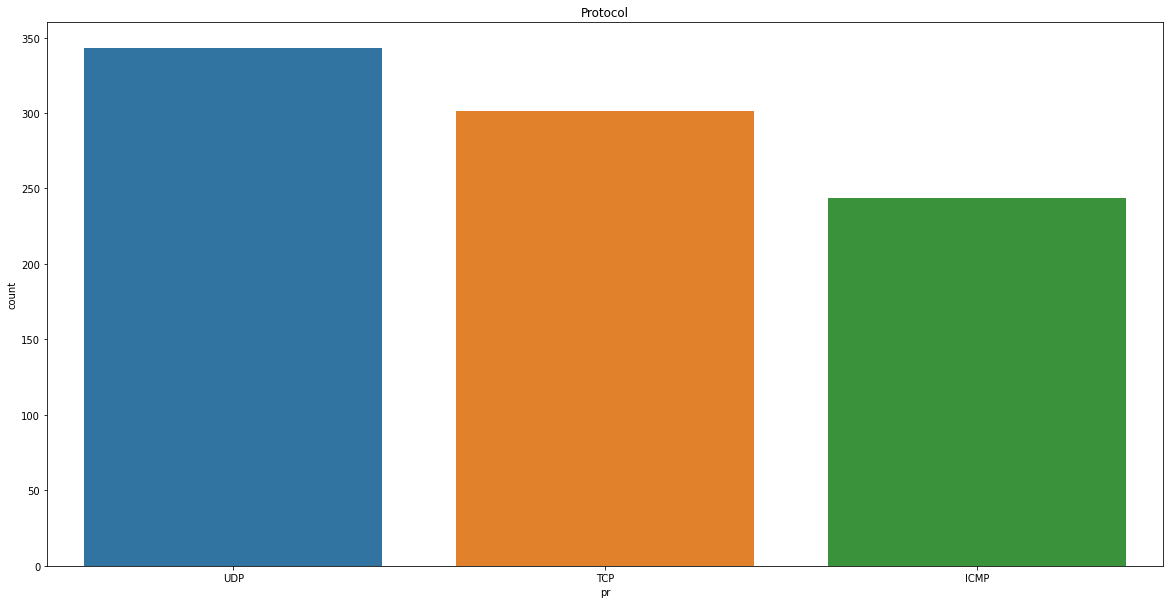

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Protocol")
sns.countplot(data=netflow1, x='pr')

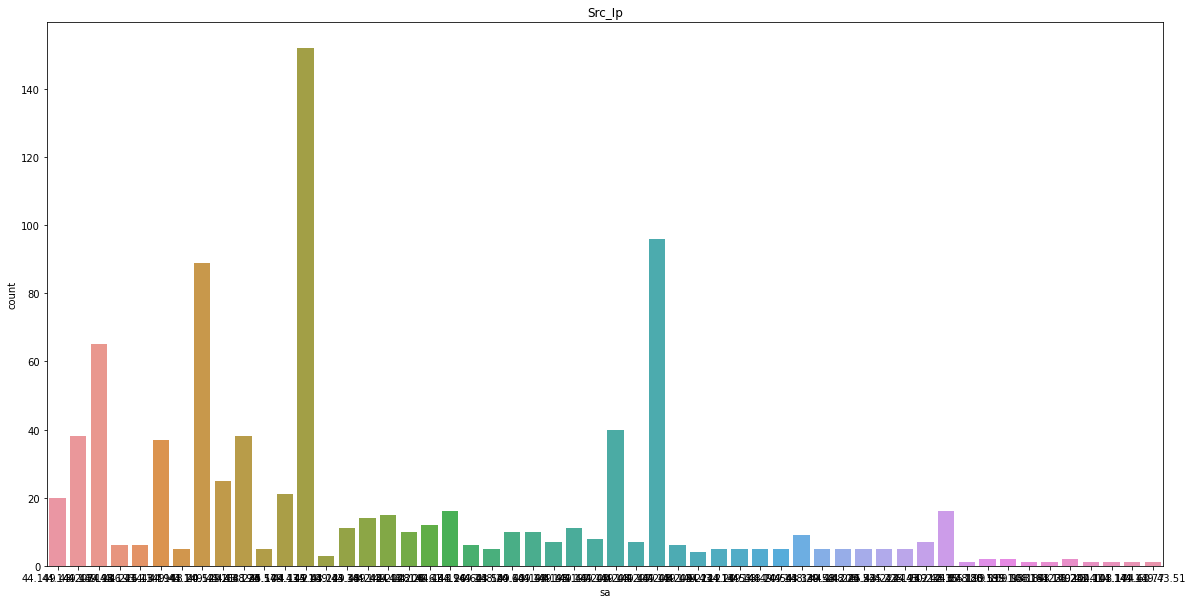

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Src_Ip")
sns.countplot(data=netflow1, x='sa')

In [ ]:
netflow2.sa.unique()

array(['44.149.43.203', '44.224.20.46', '44.224.20.41', '44.149.16.139',
       '44.225.41.134', '44.148.20.93', '44.149.20.188', '44.149.43.132',
       '44.149.43.198', '44.149.43.193', '74.116.41.13', '44.149.20.185',
       '44.143.40.30', '44.149.16.132', '44.130.99.14', '44.225.41.77',
       '44.225.42.228', '44.149.19.3', '44.149.16.7', '44.148.20.51',
       '195.37.16.115', '44.148.20.52', '44.149.43.188', '44.143.111.10',
       '44.149.43.190', '44.143.102.83', '44.225.43.1', '44.225.42.182',
       '44.149.122.194', '44.149.43.131', '44.149.43.199', '44.149.43.22',
       '44.149.43.194', '44.149.43.195', '44.149.43.196', '44.149.43.197',
       '44.149.43.200', '52.169.76.203', '44.143.111.27', '44.225.68.2',
       '44.143.111.22', '44.148.20.45', '44.148.20.46', '44.148.20.94',
       '44.149.43.130', '44.149.43.134', '44.149.43.136', '44.149.124.4',
       '44.149.43.162', '44.149.43.163', '44.149.43.202', '44.149.43.204',
       '44.149.43.206', '44.149.43.207', '44.1

In [ ]:
netflow2.sa.value_counts()

44.149.43.22     363
44.225.41.134    272
44.149.16.139    272
44.149.43.132    122
44.149.16.132     94
                ... 
85.236.36.4        1
44.149.40.197      1
88.221.214.81      1
44.143.107.61      1
44.143.107.18      1
Name: sa, Length: 184, dtype: int64

In [ ]:
netflow2.da.unique()

array(['44.149.43.21', '44.224.20.41', '44.224.20.46', '44.225.41.134',
       '44.149.16.139', '44.225.41.77', '44.225.42.228', '44.149.43.129',
       '44.149.43.193', '44.149.43.198', '74.116.41.13', '44.143.40.30',
       '44.149.43.132', '44.130.99.14', '44.149.16.132', '44.148.20.93',
       '44.149.20.185', '44.149.16.7', '44.149.19.3', '195.37.16.115',
       '255.255.255.255', '44.149.132.195', '44.225.43.1',
       '44.143.102.83', '44.149.122.194', '44.225.42.182',
       '52.169.76.203', '44.149.43.22', '44.149.43.194', '44.149.43.195',
       '44.149.43.196', '44.149.43.197', '44.149.43.199', '44.149.43.200',
       '44.149.43.131', '44.143.111.27', '44.149.43.190', '44.225.68.2',
       '44.143.111.10', '44.143.111.22', '44.148.20.45', '44.148.20.46',
       '44.148.20.94', '44.149.124.4', '44.149.43.130', '44.149.43.134',
       '44.149.43.136', '44.149.43.162', '44.149.43.163', '44.149.43.202',
       '44.149.43.203', '44.149.43.204', '44.149.43.206', '44.149.43.207',
 

In [ ]:
netflow2.da.value_counts()

44.149.43.22       353
44.225.41.134      272
44.149.16.139      272
255.255.255.255    234
44.149.43.132      120
                  ... 
44.149.57.136        1
44.225.43.132        1
44.143.107.59        1
44.143.111.89        1
44.143.102.83        1
Name: da, Length: 179, dtype: int64

In [ ]:
netflow2.pr.unique()

array(['UDP', 'TCP', 'ICMP', 'GRE'], dtype=object)

In [ ]:
netflow2.pr.value_counts()

UDP     1107
TCP     1098
ICMP     647
GRE        2
Name: pr, dtype: int64

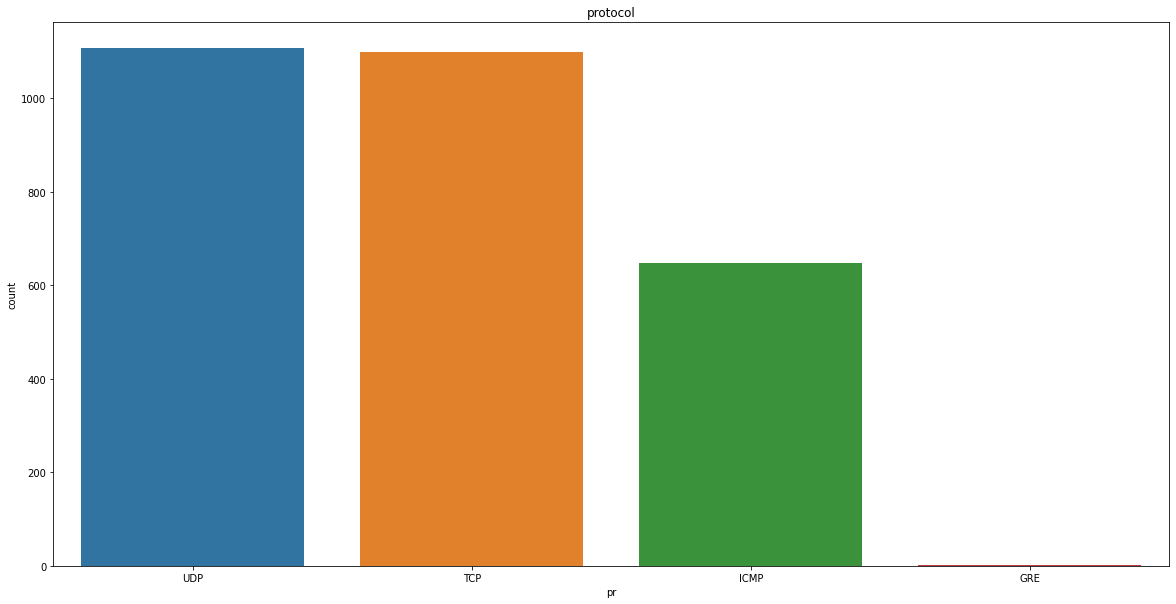

In [ ]:
plt.figure(figsize=(20,10))
plt.title("protocol")
sns.countplot(data=netflow2, x='pr')

In [ ]:
netflow3.sa.unique()

array(['44.143.107.129', '44.225.42.181', '44.149.16.139',
       '44.225.41.134', '44.149.43.132', '44.148.20.50', '44.148.20.49',
       '44.143.111.25', '44.148.237.1', '44.132.28.65', '44.143.111.10',
       '195.37.16.115', '44.143.40.30', '44.149.124.4', '44.149.66.196',
       '44.225.65.135', '44.182.21.1', '44.149.57.111', '44.149.43.21',
       '44.225.85.98', '44.149.43.203', '44.149.16.132', '44.130.99.14',
       '44.148.20.93', '44.225.43.135', '44.225.41.77', '44.149.43.198',
       '44.149.43.193', '44.149.43.199', '44.148.20.57', '44.149.43.1',
       '50.116.2.70', '44.149.43.134', '44.149.43.22', '44.149.43.188',
       '44.148.20.51', '44.149.43.189', '44.149.16.194', '44.225.68.1',
       '44.148.20.52', '44.225.40.169', '81.198.87.240', '44.149.25.4',
       '44.225.68.2', '44.149.43.190', '44.148.20.61', '192.168.1.50',
       '44.149.43.206', '44.149.43.202', '44.149.52.20', '44.225.178.69',
       '44.149.148.132', '44.143.102.147', '44.149.43.50', '44.149.43.4

In [ ]:
SrcIp = len(pd.unique(netflow3['sa']))

In [ ]:
SrcIp

186

In [ ]:
DstIp = len(pd.unique(netflow3['da']))

In [ ]:
DstIp

182

In [ ]:
Prot = len(pd.unique(netflow3['pr']))

In [ ]:
Prot

6

In [ ]:
netflow3.sa.value_counts()

44.149.43.22       393
44.149.16.139      286
44.225.41.134      284
44.149.43.21       119
44.149.43.132      115
                  ... 
192.168.1.50         1
44.143.107.19        1
178.124.134.106      1
44.149.52.20         1
44.149.43.93         1
Name: sa, Length: 185, dtype: int64

In [ ]:
netflow3.pr.unique()

array(['TCP', 'UDP', 'ICMP', 'IPIP', 'GRE', nan], dtype=object)

In [ ]:
netflow3.pr.value_counts()

UDP     1187
TCP     1163
ICMP     691
IPIP       2
GRE        1
Name: pr, dtype: int64

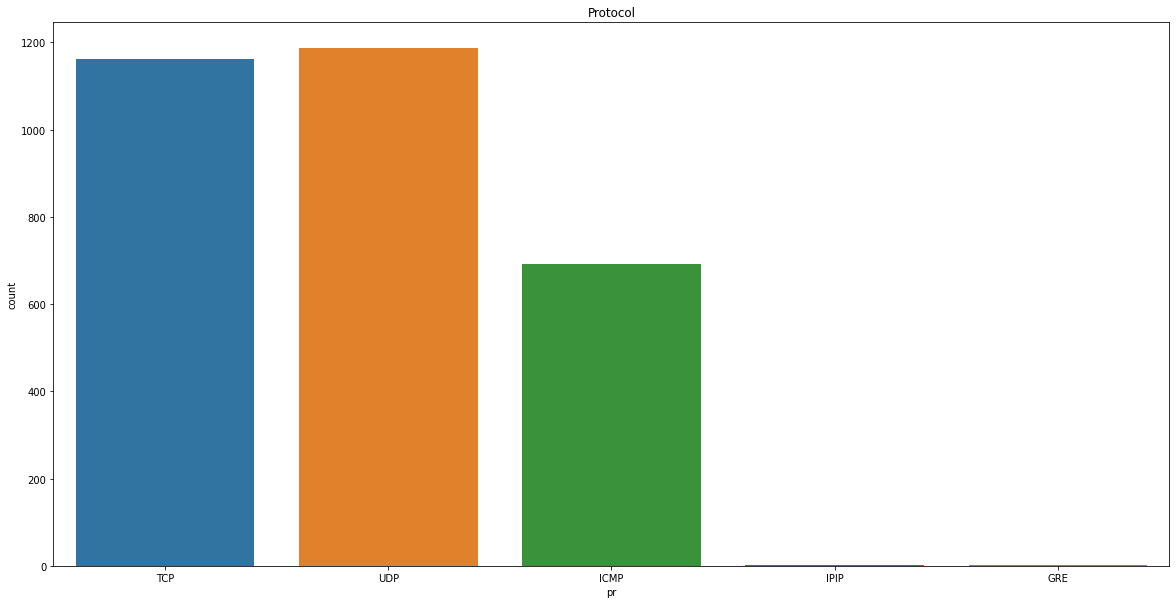

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Protocol")
sns.countplot(data=netflow3, x='pr')

In [ ]:
netflow4.sa.unique()

array(['44.149.43.209', '44.149.43.22', '44.149.43.210', '44.149.43.211',
       '44.149.43.213', '44.149.43.242', '44.143.111.18', '44.225.85.98',
       '44.149.16.139', '44.225.41.134', '44.149.16.136', '44.143.28.129',
       '44.132.28.65', '44.149.43.132', '44.143.111.22', '44.149.16.132',
       '44.130.99.14', '44.149.124.4', '44.149.66.196', '44.225.24.69',
       '44.149.43.194', '44.148.20.57', '44.149.43.196', '44.225.43.212',
       '44.225.43.222', '44.149.43.21', '44.224.20.51', '44.149.20.185',
       '44.225.40.179', '44.225.43.185', '44.225.43.187', '44.225.43.188',
       '44.225.43.162', '44.148.20.53', '44.143.111.25', '44.143.107.133',
       '44.143.102.30', '44.148.230.161', '44.224.20.45', '44.149.43.133',
       '44.149.43.135', '44.225.41.69', '44.149.43.198', '44.149.43.193',
       '74.116.41.13', '44.149.43.206', '44.149.43.205', '44.149.43.202',
       '44.149.43.197', '44.149.43.204', '44.143.102.147',
       '44.225.42.228', '44.143.107.18', '44.149.180

In [ ]:
netflow4.sa.value_counts()

44.149.43.22      326
44.225.41.134     282
44.149.16.139     282
44.149.43.132     120
44.149.16.132      56
                 ... 
44.143.106.125      1
44.149.43.51        1
35.224.170.84       1
44.225.160.74       1
44.149.43.129       1
Name: sa, Length: 166, dtype: int64

In [ ]:
netflow4.pr.unique()

array(['ICMP', 'TCP', 'UDP', 'GRE', nan], dtype=object)

In [ ]:
netflow4.pr.value_counts()

TCP     1083
UDP      928
ICMP     618
GRE        1
Name: pr, dtype: int64

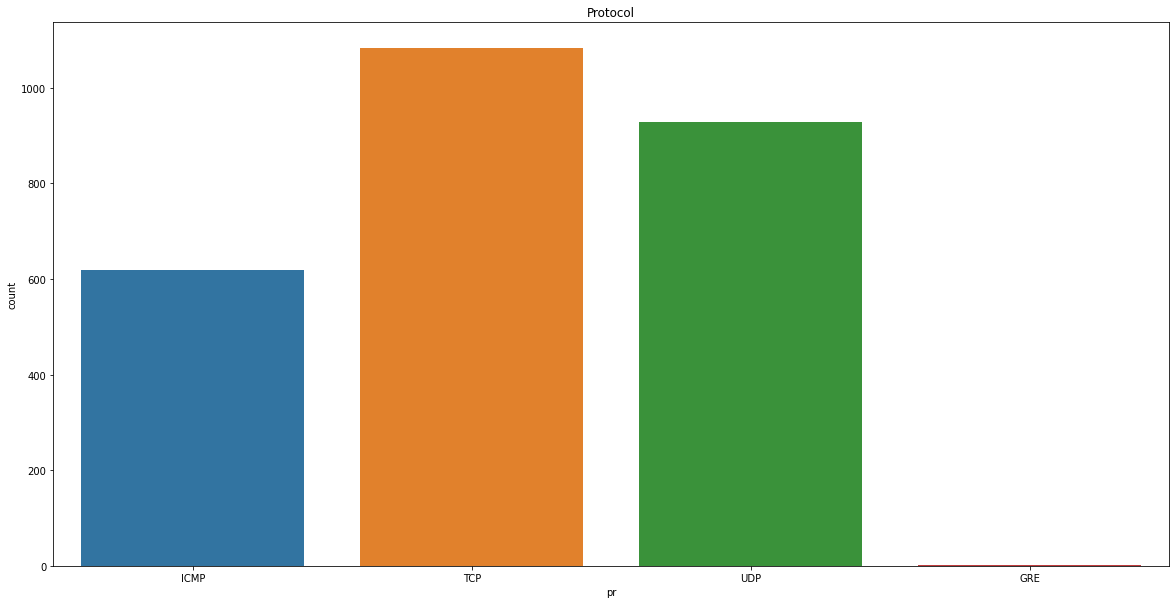

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Protocol")
sns.countplot(data=netflow4, x='pr')

In [ ]:
pcap1.Source.value_counts()

02:57:5f:cf:1b:3f                   15
Routerbo_8f:4c:ce                   10
Routerbo_0c:16:75                    5
Routerbo_c7:b5:33                    5
Routerbo_c7:b5:32                    5
MS-NLB-PhysServer-04_46:4e:4f:67     5
Routerbo_5b:c5:06                    5
02:da:4b:ea:4b:05                    5
02:fb:71:cf:3f:80                    5
Routerbo_c7:b5:2f                    5
Routerbo_8c:d3:3c                    5
Routerbo_c7:b5:31                    5
Routerbo_c7:b5:30                    5
Name: Source, dtype: int64

In [ ]:
pcap1.Source.unique()

array(['02:fb:71:cf:3f:80', 'Routerbo_c7:b5:2f', 'Routerbo_c7:b5:30',
       'Routerbo_c7:b5:31', 'Routerbo_c7:b5:32', 'Routerbo_c7:b5:33',
       'MS-NLB-PhysServer-04_46:4e:4f:67', '02:da:4b:ea:4b:05',
       'Routerbo_5b:c5:06', '02:57:5f:cf:1b:3f', 'Routerbo_8c:d3:3c',
       'Routerbo_8f:4c:ce', 'Routerbo_0c:16:75'], dtype=object)

In [ ]:
source = len(pd.unique(pcap1['Source']))

In [ ]:
source

13

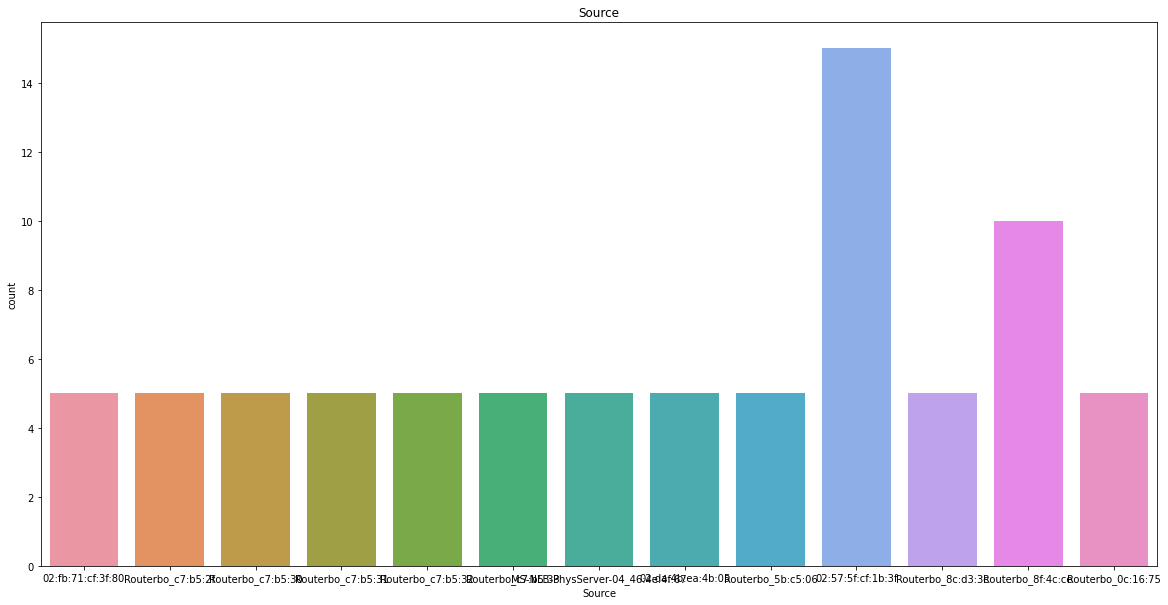

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Source")
sns.countplot(data=pcap1, x='Source')

In [ ]:
pcap1.Info.unique()

array(['MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User-Bridge 120 SysN=router-user.db0pas SysD=MikroTik RouterOS 6.46.3 (stable) RB750UP ',
       'MA/00:0c:42:c7:b5:2f IN/Sitenet/ether1-sitenet 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/00:0c:42:c7:b5:31 IN/ether3-pas-tvp 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/00:0c:42:c7:b5:32 IN/ether4-pas-sl 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/00:0c:42:c7:b5:33 IN/ether5-pas-xdo 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/02:04:46:4e:4f:67 IN/EoIP-User-Bridge 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP ',
       'MA/02:da:4b:ea:4b:05 IN/Sitenet/EoIP-Sitenet-Powerbox 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP

In [ ]:
info = len(pd.unique(pcap1['Info']))

In [ ]:
info

13

Correlation between each features

In [ ]:
corelation = netflow3.corr()

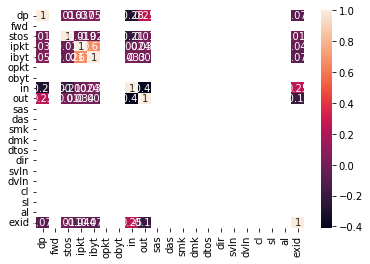

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [ ]:
netflow1.corr()

,td,sp,dp,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,svln,dvln,cl,sl,al,exid
td,1.000000,-0.043940,-0.044065,NaN,0.019272,0.198987,0.007558,NaN,NaN,-0.003754,0.024291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.019788
sp,-0.043940,1.000000,-0.381435,NaN,-0.129150,0.051608,-0.016956,NaN,NaN,0.159069,-0.296438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121546
dp,-0.044065,-0.381435,1.000000,NaN,0.104449,0.084953,0.131388,NaN,NaN,-0.400345,0.362197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.120512
fwd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stos,0.019272,-0.129150,0.104449,NaN,1.000000,-0.045854,-0.036920,NaN,NaN,-0.210440,0.026720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082817
ipkt,0.198987,0.051608,0.084953,NaN,-0.045854,1.000000,0.840457,NaN,NaN,0.019074,0.095303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080333
ibyt,0.007558,-0.016956,0.131388,NaN,-0.036920,0.840457,1.000000,NaN,NaN,0.060716,-0.004287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039787
opkt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
obyt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in,-0.003754,0.159069,-0.400345,NaN,-0.210440,0.019074,0.060716,NaN,NaN,1.000000,-0.570531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661573


In [ ]:
pcap2 = pd.read_csv('/content/lldp-202108150656.csv')

In [ ]:
pcap2.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Routerbo_8f:4c:ce,LLDP_Multicast,LLDP,131,MA/4c:5e:0c:8f:4c:ce IN/bridge-local 120 SysN=...
1,2,0.810879,02:fb:71:cf:3f:80,LLDP_Multicast,LLDP,130,MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User...
2,3,0.822114,Routerbo_c7:b5:2f,LLDP_Multicast,LLDP,146,MA/00:0c:42:c7:b5:2f IN/Sitenet/ether1-sitenet...
3,4,0.824924,Routerbo_c7:b5:30,LLDP_Multicast,LLDP,124,MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 Sys...
4,5,0.825409,Routerbo_c7:b5:31,LLDP_Multicast,LLDP,138,MA/00:0c:42:c7:b5:31 IN/ether3-pas-tvp 120 Sys...


In [ ]:
pcap2.Info.value_counts()

MA/02:57:5f:cf:1b:3f IN/EoIP-Sitenetz-Powerbridge 120 SysN=PowerboxPAS SysD=MikroTik RouterOS 6.48.1 (stable) RB750Pr2               15
MA/02:04:46:4e:4f:67 IN/EoIP-User-Bridge 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP                       15
MA/d4:ca:6d:30:41:ec IN/bridge/ether1 120 SysN=bb-dl0pf.db0tvp SysD=MikroTik RouterOS 6.48 (stable) RB Metal 2SHPn                   10
MA/4c:5e:0c:8f:4c:ce IN/bridge-local 120 SysN=lnk-oe5xhr.db0pas SysD=MikroTik RouterOS 6.43.2 (stable) RB911G-5HPnD                  10
MA/4c:5e:0c:8c:d3:3c IN/bridge-local 120 SysN=lnk-db0hup.db0pas SysD=MikroTik RouterOS 6.43.4 (stable) RB911G-5HPnD                   5
MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 SysN=router.db0pas SysD=MikroTik RouterOS 6.46.4 (stable) RB750UP                          5
MA/d4:ca:6d:9d:8c:ca IN/bridge1/ether1-local 120 SysN=bb-db0hup.db0tvp SysD=MikroTik RouterOS 6.48 (stable) RB Metal 5SHPn            5
MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User-B

In [ ]:
pcap2.shape

(135, 7)

In [ ]:
pcap2.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [ ]:
new_pcap2 = pcap2.loc[pcap2.Info.notna(), ['Source', 'Info']]
new_pcap2[["Source", "Info"]] = new_pcap2[["Source", "Info"]].replace(np.nan, 'none', regex=True)

In [ ]:
new_pcap2.shape

(135, 2)

In [ ]:
new_pcap2.head()

,Source,Info
0,Routerbo_8f:4c:ce,MA/4c:5e:0c:8f:4c:ce IN/bridge-local 120 SysN=...
1,02:fb:71:cf:3f:80,MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User...
2,Routerbo_c7:b5:2f,MA/00:0c:42:c7:b5:2f IN/Sitenet/ether1-sitenet...
3,Routerbo_c7:b5:30,MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 Sys...
4,Routerbo_c7:b5:31,MA/00:0c:42:c7:b5:31 IN/ether3-pas-tvp 120 Sys...


In [ ]:
le = LabelEncoder()
new_pcap2.Info = le.fit_transform(new_pcap2.Info)
new_pcap2.Source = le.fit_transform(new_pcap2.Source)

Perform initial K-means clustering on random NetFlow data before pre-processing

In [ ]:
new_pcap2.head(n=30)

,Source,Info
0,9,11
1,2,9
2,12,0
3,13,1
4,14,2
5,15,3
6,16,4
7,3,5
8,1,8
9,10,15


In [ ]:
new_pcap2.Info.unique()

array([11,  9,  0,  1,  2,  3,  4,  5,  8, 15, 17, 18, 19, 20, 14,  7,  6,
       10, 12, 16, 13])

Text(0, 0.5, 'Info')

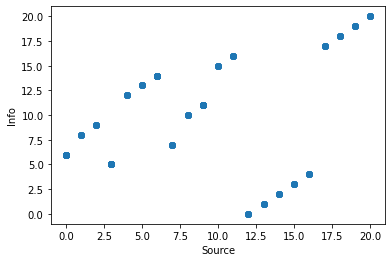

In [ ]:
plt.scatter(new_pcap2.Source,new_pcap2['Info'])
plt.xlabel('Source')
plt.ylabel('Info')

In [ ]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(new_pcap2[['Source', 'Info']])
y_predicted

array([2, 3, 0, 0, 0, 0, 0, 3, 3, 5, 1, 1, 1, 1, 4, 4, 2, 3, 3, 3, 2, 4,
       2, 5, 4, 2, 0, 3, 0, 0, 0, 0, 3, 3, 3, 5, 3, 1, 1, 1, 1, 4, 4, 2,
       3, 3, 3, 2, 3, 4, 2, 3, 5, 3, 4, 2, 0, 3, 0, 0, 0, 0, 3, 3, 5, 3,
       1, 1, 1, 1, 3, 4, 4, 2, 3, 3, 3, 2, 3, 4, 2, 5, 3, 4, 2, 3, 0, 0,
       0, 0, 0, 3, 3, 5, 1, 1, 1, 1, 4, 4, 2, 3, 3, 3, 2, 4, 2, 5, 4, 2,
       3, 0, 0, 0, 0, 0, 3, 3, 5, 1, 1, 1, 1, 3, 4, 4, 2, 3, 3, 3, 2, 4,
       2, 5, 4], dtype=int32)

In [ ]:
new_pcap2['cluster']=y_predicted
new_pcap2.head(n=30)

,Source,Info,cluster
0,9,11,2
1,2,9,3
2,12,0,0
3,13,1,0
4,14,2,0
5,15,3,0
6,16,4,0
7,3,5,3
8,1,8,3
9,10,15,5


In [ ]:
km.cluster_centers_

array([[14.  ,  2.  ],
       [18.5 , 18.5 ],
       [ 8.25,  9.75],
       [ 1.5 ,  6.25],
       [ 5.25, 13.25],
       [10.5 , 15.5 ]])

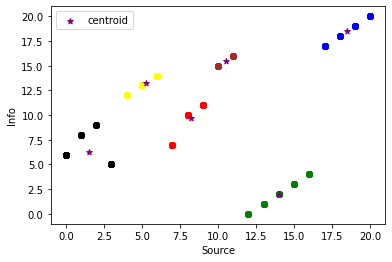

In [ ]:
new_pcap21 = new_pcap2[new_pcap2.cluster==0]
new_pcap22 = new_pcap2[new_pcap2.cluster==1]
new_pcap23 = new_pcap2[new_pcap2.cluster==2]
new_pcap24 = new_pcap2[new_pcap2.cluster==3]
new_pcap25 = new_pcap2[new_pcap2.cluster==4]
new_pcap26 = new_pcap2[new_pcap2.cluster==5]
plt.scatter(new_pcap21.Source,new_pcap21['Info'],color='green')
plt.scatter(new_pcap22.Source,new_pcap22['Info'],color='blue')
plt.scatter(new_pcap23.Source,new_pcap23['Info'],color='red')
plt.scatter(new_pcap24.Source,new_pcap24['Info'],color='black')
plt.scatter(new_pcap25.Source,new_pcap25['Info'],color='yellow')
plt.scatter(new_pcap26.Source,new_pcap26['Info'],color='brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Source')
plt.ylabel('Info')
plt.legend()




In [ ]:
netflow3.columns

Index(['ts', 'te', 'td', 'sa', 'da', 'sp', 'dp', 'pr', 'flg', 'fwd', 'stos',
       'ipkt', 'ibyt', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk',
       'dtos', 'dir', 'nh', 'nhb', 'svln', 'dvln', 'ismc', 'odmc', 'idmc',
       'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7',
       'mpls8', 'mpls9', 'mpls10', 'cl', 'sl', 'al', 'ra', 'eng', 'exid',
       'tr'],
      dtype='object')

In [ ]:
col_list = ["sa", "da", "sp", "dp", "pr"]

In [ ]:
new_netflow3 = pd.read_csv("/content/nfcapd202108150655.csv", usecols=col_list)

In [ ]:
new_netflow3.head(n=10)

,sa,da,sp,dp,pr
0,44.143.107.129,44.225.42.181,39776,14580.0,TCP
1,44.225.42.181,44.143.107.129,14580,39776.0,TCP
2,44.149.16.139,44.225.41.134,43378,8080.0,TCP
3,44.225.41.134,44.149.16.139,8080,43378.0,TCP
4,44.149.16.139,44.225.41.134,57544,81.0,TCP
5,44.225.41.134,44.149.16.139,81,57544.0,TCP
6,44.149.43.132,44.149.43.129,123,123.0,UDP
7,44.148.20.50,255.255.255.255,5678,5678.0,UDP
8,44.148.20.49,44.149.43.68,44575,37008.0,UDP
9,44.148.20.50,255.255.255.255,5678,5678.0,UDP


In [ ]:
new_netflow3[["sa", "da", "pr"]] = new_netflow3[["sa", "da", "pr"]].replace(np.nan, 'none', regex=True)

In [ ]:
new_netflow3.dtypes

sa     object
da     object
sp     object
dp    float64
pr     object
dtype: object

In [ ]:
new_netflow3.head(n=20)

,sa,da,sp,dp,pr
0,44.143.107.129,44.225.42.181,39776,14580.0,TCP
1,44.225.42.181,44.143.107.129,14580,39776.0,TCP
2,44.149.16.139,44.225.41.134,43378,8080.0,TCP
3,44.225.41.134,44.149.16.139,8080,43378.0,TCP
4,44.149.16.139,44.225.41.134,57544,81.0,TCP
5,44.225.41.134,44.149.16.139,81,57544.0,TCP
6,44.149.43.132,44.149.43.129,123,123.0,UDP
7,44.148.20.50,255.255.255.255,5678,5678.0,UDP
8,44.148.20.49,44.149.43.68,44575,37008.0,UDP
9,44.148.20.50,255.255.255.255,5678,5678.0,UDP


In [ ]:
 new_netflow3.sa = le.fit_transform(new_netflow3.sa)
 new_netflow3.da = le.fit_transform(new_netflow3.da)
new_netflow3.pr = le.fit_transform(new_netflow3.pr)

In [ ]:
new_netflow3.head(n=10)

,sa,da,sp,dp,pr
0,29,151,39776,14580.0,3
1,156,28,14580,39776.0,3
2,70,148,43378,8080.0,3
3,153,69,8080,43378.0,3
4,70,148,57544,81.0,3
5,153,69,81,57544.0,3
6,88,84,123,123.0,4
7,48,13,5678,5678.0,4
8,47,126,44575,37008.0,4
9,48,13,5678,5678.0,4


In [ ]:
new_netflow3.sa.unique()

array([ 29, 156,  70, 153,  88,  48,  47,  37,  62,  19,  32,  14,  42,
        66, 135, 173, 138, 134, 116, 176, 109,  68,  18,  58, 162, 155,
       104,  99, 105,  53,  84, 177,  90, 120,  96,  49,  97,  72, 174,
        50, 151, 181,  81, 175,  98,  56,  12, 112, 108, 133, 147,  67,
        23, 128, 126, 140, 150, 160,  45,  33,  78, 139,  80,  74,  76,
        27, 158,  92, 121,  87, 179,  43, 125, 102,  55, 145,  69,  41,
        60,  75, 157,  77,  64,  38,  20,  21,  79,  86,   0,  52,  73,
        17,  57, 127, 123,  94, 141,  35,  95,  46, 110, 167, 166, 149,
       130, 146, 170,  36,  34,  54,  51, 142, 113, 178, 124,  24,  22,
        59, 101, 107, 100, 103, 137, 144, 114, 115, 117, 118, 119,  63,
       132, 148, 143,  44, 152, 136, 171, 172, 154,  25,  89,  91, 163,
       164, 165,   5, 111, 168,  82, 159,  26, 161,  39,   9,  10,  11,
         6, 180,  65,  40,  30,   2,   1,   8,  31, 131,  93, 183, 182,
        61, 169,  83,  16, 106,   3,   7, 122, 129,  85,  13,   

Text(0, 0.5, 'da')

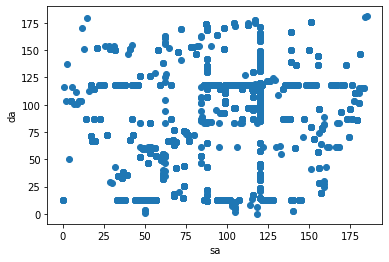

In [ ]:
plt.scatter(new_netflow3.sa,new_netflow3['da'])
plt.xlabel('sa')
plt.ylabel('da')

Text(0, 0.5, 'pr')

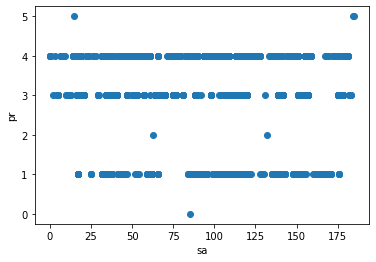

In [ ]:
plt.scatter(new_netflow3.sa,new_netflow3['pr'])
plt.xlabel('sa')
plt.ylabel('pr')

In [ ]:
km_netflow = KMeans(n_clusters=6)
y_predicted_netflow = km_netflow.fit_predict(new_netflow3[['sa', 'pr']])
y_predicted_netflow

array([4, 2, 5, ..., 2, 2, 4], dtype=int32)

In [ ]:
new_netflow3['cluster']=y_predicted_netflow
new_netflow3.head()

,sa,da,sp,dp,pr,cluster
0,29,151,39776,14580.0,3,4
1,156,28,14580,39776.0,3,2
2,70,148,43378,8080.0,3,5
3,153,69,8080,43378.0,3,2
4,70,148,57544,81.0,3,5


In [ ]:
km_netflow.cluster_centers_

array([[118.08236659,   2.274942  ],
       [ 45.98641304,   3.25543478],
       [155.03020668,   2.98569157],
       [ 93.99198397,   3.40280561],
       [ 17.76978417,   3.36690647],
       [ 69.53090909,   3.17090909]])

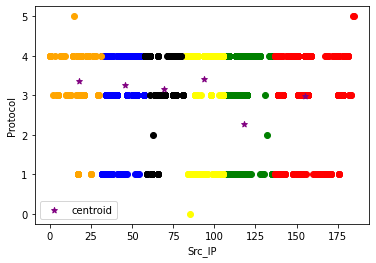

In [ ]:
new_netflow31 = new_netflow3[new_netflow3.cluster==0]
new_netflow32 = new_netflow3[new_netflow3.cluster==1]
new_netflow33 = new_netflow3[new_netflow3.cluster==2]
new_netflow34 = new_netflow3[new_netflow3.cluster==3]
new_netflow35 = new_netflow3[new_netflow3.cluster==4]
new_netflow36 = new_netflow3[new_netflow3.cluster==5]
plt.scatter(new_netflow31.sa,new_netflow31['pr'],color='green')
plt.scatter(new_netflow32.sa,new_netflow32['pr'],color='blue')
plt.scatter(new_netflow33.sa,new_netflow33['pr'],color='red')
plt.scatter(new_netflow34.sa,new_netflow34['pr'],color='yellow')
plt.scatter(new_netflow35.sa,new_netflow35['pr'],color='orange')
plt.scatter(new_netflow36.sa,new_netflow36['pr'],color='black')
plt.scatter(km_netflow.cluster_centers_[:,0],km_netflow.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Src_IP')
plt.ylabel('Protocol')
plt.legend()